In [827]:
# !pwd

In [828]:
import torch
import torch.nn as nn
import pandas as pd

import numpy as np
from itertools import combinations
import pickle
from tqdm import tqdm_notebook
from itertools import combinations

import matplotlib.pyplot as plt

In [829]:
# data = pd.read_pickle("/home/ubuntu/siheon/data20000 (1).pkl")
ROOT = '/home/ubuntu/siheon/alldata.csv'
# 인덱스 번호 1275번이 마지막 ( 1276번쨰 )

# uspto dataset and label
data = np.load('./dataset/1218_numpy_test_uspto.npy',allow_pickle=True)
data_label = pd.read_csv('./dataset/1218_numpy_test_uspto.csv')
# total_data = pd.read_csv('./alldata.csv')

# my test data

# data = np.load('mydatatest.npy',allow_pickle=True)
# data_label = pd.read_csv('./mydatatestlabel.csv')

# data_original = pd.read_pickle('./1122lastdata.pickle')
# check_data = pd.read_pickle('./1122lastdataset.pickle')
# data2 = pd.read_csv("/content/drive/MyDrive/data20000.csv")
# with open ("/content/drive/MyDrive/data20000.pkl", "rb") as f:
#     data = pickle.load(f)
# data['A_label'] = data2['A_label']
# data['B_label'] = data2['B_label']
# data


In [830]:
# data_label.label[2551] = 'G'

In [831]:
data_label

,label
0,B
1,H
2,H
3,C
4,H
...,...
2995,C
2996,C
2997,C
2998,H


In [832]:
data_label['embedding'] = 0
data_label = data_label[['embedding','label']]
data_label.columns = ['embedding','label']
total_data = data_label
for i,v in enumerate(total_data.label):
    total_data['embedding'].loc[i] = np.array(data[i],dtype= object)


/home/ubuntu/anaconda3/envs/pytorch1.7.1_p37/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/home/ubuntu/anaconda3/envs/pytorch1.7.1_p37/lib/python3.7/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [833]:
total_data.head()

,embedding,label
0,"[0.12889894843101501, -0.27162453532218933, -0...",B
1,"[-0.6141639351844788, 0.029687397181987762, -0...",H
2,"[-0.1127941831946373, 0.27228477597236633, 0.3...",H
3,"[0.07641201466321945, 0.012431727722287178, 0....",C
4,"[0.4429985284805298, 0.32174187898635864, -0.1...",H


In [834]:
from sklearn.preprocessing import LabelEncoder
input_labels = ['A','B','C','D','E','F','G','H']
encoder = LabelEncoder()
encoder.fit(input_labels)
total_data.label = encoder.transform(total_data.label)

In [835]:
# total_data_test.columns = ['embedding','label']

In [836]:
# data_label['embedding']= 0

In [837]:
# data_label = data_label[['embedding','label']]

In [838]:
# total_data = data_label

In [839]:
# for i,v in enumerate(total_data.label):
#     total_data['embedding'].loc[i] = np.array(data[i],dtype= object)

In [840]:
# test_data = pd.read_csv("/home/ubuntu/siheon/1031dataframe.pickle")
# test_data = pd.read_pickle('./1122lastdata.pickle')

In [841]:
# from sklearn.preprocessing import LabelEncoder
# input_labels = ['A','B','C','D','E','F','G','H']
# encoder = LabelEncoder()
# encoder.fit(input_labels)
# total_data.label = encoder.transform(total_data.label)

In [842]:
# A_patent = data[['A_patent', 'A_label']]
# A_patent = pd.DataFrame(A_patent.values, columns = ['patent', 'label'])
# B_patent = data[['B_patent', 'B_label']]
# B_patent = pd.DataFrame(B_patent.values, columns = ['patent', 'label'])
# total_data = pd.concat([A_patent, B_patent])
# total_data.index = range(len(total_data))

total_data.columns = ['patent','label']

In [843]:
print(type(total_data.patent[0]))
print(type(total_data.label[0]))

<class 'numpy.ndarray'>
<class 'numpy.int64'>


In [844]:
total_data.patent = total_data.patent.apply(pd.to_numeric)

In [845]:
# train_data = total_data[total_data['label'] < 4]
# test_data = total_data[total_data['label'] > 3]
# x_train = train_data['patent'].values
# y_train = train_data['label'].values.astype(np.int)
# x_test = test_data['patent'].values
# y_test = test_data['label'].values.astype(np.int)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(total_data['patent'].values, total_data['label'].values.astype(np.int32), test_size=0.2, random_state=42)

x_train = np.vstack(x_train)
x_test = np.vstack(x_test)
# x_test_2 = np.vstack(test_total_data['patent'].values)
# y_test_2 = test_total_data['label'].values.astype(np.int)

In [846]:
class patent_dataset(torch.utils.data.Dataset):
    def __init__(self, x_data, y_data):
        self.x = torch.FloatTensor(x_data)
        self.y = torch.tensor(y_data)

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]



def generate_pair(data, label):
    batch_num = len(data)
    idx = torch.tensor(list(combinations(range(batch_num), 2)))
    input1 = data[idx[:,0]]
    input2 = data[idx[:,1]]
    label = (label[idx[:,0]] == label[idx[:,1]]).type(torch.int)
    return input1, input2, label

In [847]:
batch_num = 128
train_dataset = patent_dataset(x_train, y_train)
test_dataset = patent_dataset(x_test, y_test)
original_uspto_dataset = patent_dataset(np.vstack(total_data['patent'].values),np.vstack(total_data['label'].values.astype(np.int32)))

# test_dataset2 = patent_dataset(x_test_2,y_test_2)

In [848]:
print(len(train_dataset))
print(len(test_dataset))
print(len(original_uspto_dataset))
# print(len(test_dataset2))

2400
600
3000


In [849]:
train_dataloader = torch.utils.data.DataLoader(train_dataset, shuffle = True, batch_size = batch_num)
test_dataloader = torch.utils.data.DataLoader(test_dataset, shuffle = True, batch_size = batch_num)
original_uspto_dataloader = torch.utils.data.DataLoader(original_uspto_dataset, shuffle = True, batch_size = batch_num)
# test_dataloader_2 = torch.utils.data.DataLoader(test_dataset2, shuffle = True, batch_size = batch_num)

In [850]:
print(len(train_dataloader))
print(len(test_dataloader))
# print(len(test_dataloader_2))

19
5


In [851]:
class fnn(nn.Module):
    def __init__(self):
        super(fnn, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(1024, 512),
            nn.LeakyReLU(),
            nn.Linear(512, 256),
            nn.LeakyReLU(),
            nn.Linear(256, 64)
        )

    def forward(self, x1, x2):
        out1 = self.fc(x1)
        out2 = self.fc(x2)
        return out1, out2

In [852]:
def loss_fn(out1, out2, label, margin = 1):
    distance = torch.sum((out1 - out2)**2, 1)
    positive_loss = label*distance
#     positive_loss = label*distance+margin/1000
    negative_loss = (1-label)*torch.clamp(margin - distance, min = 0)
    return torch.mean(positive_loss + negative_loss)

In [853]:
model = fnn().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr = 5*1e-4)


In [854]:
# epochs = 200
# train_loss_list = []
# test_loss_list = []
# best_loss = 100000
# for epoch in tqdm_notebook(range(1, epochs+1)):
#     train_loss = 0
#     model.train()
#     for idx, (data, labels) in enumerate(train_dataloader):
#         optimizer.zero_grad()
#         emb1, emb2, label = generate_pair(data, labels)
#         out1, out2 = model(emb1.cuda(), emb2.cuda())
#         loss = loss_fn(out1, out2, label.cuda())
#         loss.backward()
#         optimizer.step()
#         train_loss += loss.item()

#     train_loss /= len(train_dataloader)
#     train_loss_list.append(train_loss)

#     model.eval()
#     test_loss = 0
#     for idx, (data, labels) in enumerate(test_dataloader):
#         emb1, emb2, label = generate_pair(data, labels)
#         out1, out2 = model(emb1.cuda(), emb2.cuda())
#         loss = loss_fn(out1, out2, label.cuda())
#         test_loss += loss.item()
        
        

#     test_loss /= len(test_dataloader)
#     test_loss_list.append(test_loss)

#     if test_loss < best_loss:
#         best_loss = test_loss
#         torch.save(model, "patentbest_model_1123.pt")
        
#     print("Epoch : ", epoch, "Train loss : ", train_loss, "Test loss : ", test_loss)

/home/ubuntu/anaconda3/envs/pytorch1.7.1_p37/lib/python3.7/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch :  1 Train loss :  0.33386749735004023 Test loss :  0.1991927593946457
Epoch :  2 Train loss :  0.188034472496886 Test loss :  0.17517662346363067
Epoch :  3 Train loss :  0.1633711465095219 Test loss :  0.1601179599761963
Epoch :  4 Train loss :  0.14572770736719431 Test loss :  0.15351903885602952
Epoch :  5 Train loss :  0.1311121406523805 Test loss :  0.15109309554100037
Epoch :  6 Train loss :  0.1190499188868623 Test loss :  0.146720352768898
Epoch :  7 Train loss :  0.10980766109730068 Test loss :  0.15247467160224915
Epoch :  8 Train loss :  0.10077340116626338 Test loss :  0.14671459496021272
Epoch :  9 Train loss :  0.09135807089899715 Test loss :  0.1454337030649185
Epoch :  10 Train loss :  0.08105901648339472 Test loss :  0.15284321159124375
Epoch :  11 Train loss :  0.0759556840517019 Test loss :  0.15602754354476928
Epoch :  12 Train loss :  0.06994650787428806 Test loss :  0.1493358224630356
Epoch :  13 Train loss :  0.06331925623511013 Test loss :  0.145448362827

Epoch :  105 Train loss :  0.008480506740804566 Test loss :  0.15984173119068146
Epoch :  106 Train loss :  0.008363377327393545 Test loss :  0.1565304070711136
Epoch :  107 Train loss :  0.008263932436851687 Test loss :  0.14641236066818236
Epoch :  108 Train loss :  0.008765137006871794 Test loss :  0.14110799133777618
Epoch :  109 Train loss :  0.00833094440474126 Test loss :  0.1495983973145485
Epoch :  110 Train loss :  0.007252301855355893 Test loss :  0.15294117331504822
Epoch :  111 Train loss :  0.005934936147624333 Test loss :  0.15241879671812059
Epoch :  112 Train loss :  0.007150886963293152 Test loss :  0.15706440508365632
Epoch :  113 Train loss :  0.006477348794425397 Test loss :  0.14723703265190125
Epoch :  114 Train loss :  0.005872550613467435 Test loss :  0.15399461537599562
Epoch :  115 Train loss :  0.0061570842793260356 Test loss :  0.14926512390375138
Epoch :  116 Train loss :  0.006389503618457208 Test loss :  0.1501002252101898
Epoch :  117 Train loss :  0.00

In [855]:
# import matplotlib.pyplot as plt

# plt.plot(train_loss_list, label = "train")
# plt.plot(test_loss_list, label = "test")
# plt.legend(loc = "best",fontsize = 16)
# plt.xlabel('Epochs',labelpad=15,fontdict={'size':14})
# plt.ylabel('Loss',labelpad = 20,fontdict={'size':14})
# plt.tight_layout()
# plt.savefig('./loss.png',
#             facecolor='white',
#             edgecolor='black',
#             format='png', dpi=300)

In [856]:
torch.save(model, "/home/ubuntu/siheon/model/230111bert_mode_1024.pt")
# torch.save(model, "/home/ubuntu/siheon/model/230111patentbert_mode_1024.pt")

In [857]:
# model = torch.load("/home/ubuntu/siheon/model/230111bert_mode_1024.pt")
# model.eval()
# model = torch.load("/home/ubuntu/siheon/model/230111patentbert_mode_1024.pt")
model.eval()

fnn(
  (fc): Sequential(
    (0): Linear(in_features=1024, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=256, out_features=64, bias=True)
  )
)

In [858]:
original_train_data = []
original_train_data_label = []

for i,v in enumerate(x_train):
    original_train_data.append(torch.tensor(v))
    original_train_data_label.append(torch.tensor(y_train[i]))
original_train_data = torch.stack(original_train_data)
original_train_data_label = torch.stack(original_train_data_label)

In [859]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

# 2차원으로 차원 축소
n_components = 2

# t-sne 모델 생성
tsne = TSNE(n_components=n_components)

# 학습한 결과 2차원 공간 값 출력
result_original = tsne.fit_transform(original_train_data.numpy())

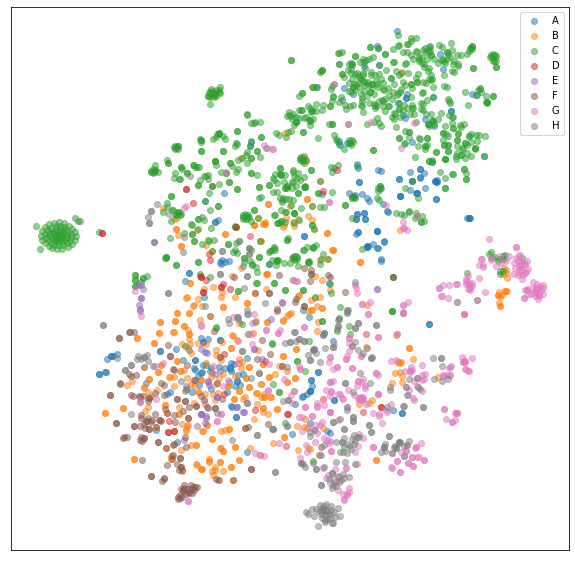

In [860]:
plt.figure(figsize = [10,10])
point_labels = ['A', 'B','C', 'D', 'E', 'F','G','H']
for i in range(8):
    idx = torch.where(original_train_data_label == i)[0]
    plt.scatter(result_original[idx,0], result_original[idx,1], label = point_labels[i],alpha = 0.5,cmap = plt.cm.rainbow)

plt.legend(loc = "best", fontsize = 15)
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)
plt.legend(loc='upper right')
# plt.show()
plt.savefig('./dataset/tsne_data/230111bertcontrastive_original.pdf',
            facecolor='white',
            edgecolor='black',
            format='pdf', dpi=300)

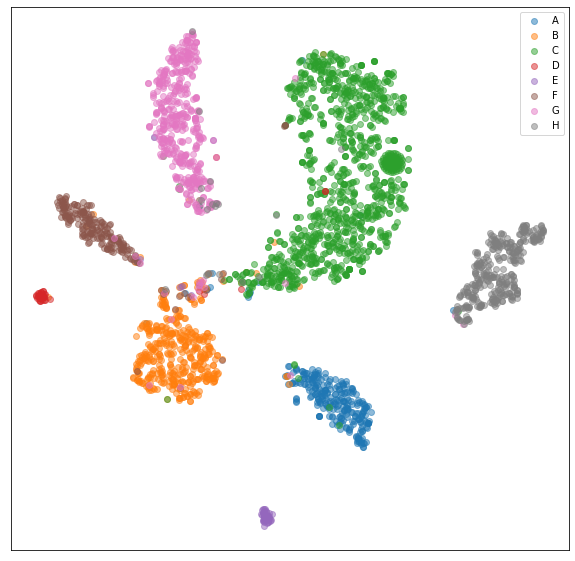

In [861]:
original_uspto_dataset_after = []
original_uspto_dataset_after_labels = []
model.eval()
for idx, (data,labels) in enumerate(original_uspto_dataloader):
#     out1,out2 = model(data.cuda(), torch.ones(1024).cuda())
    out1,out2 = model(data.cuda(), torch.ones(1024).cuda())
    original_uspto_dataset_after.append(out1.cpu().detach())
    original_uspto_dataset_after_labels.append(labels)
    
original_out = torch.cat(original_uspto_dataset_after)
original_out_label = torch.cat(original_uspto_dataset_after_labels)
# '-------------------------------------------------'
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

# 2차원으로 차원 축소
n_components = 2

# t-sne 모델 생성
tsne = TSNE(n_components=n_components)

# 학습한 결과 2차원 공간 값 출력
result = tsne.fit_transform(original_out.numpy())
# '-------------------------------------------------'

plt.figure(figsize = [10,10])
point_labels = ['A', 'B','C', 'D', 'E', 'F','G','H']
for i in range(8):
    idx = torch.where(original_out_label == i)[0]
    plt.scatter(result[idx,0], result[idx,1], label = point_labels[i],alpha = 0.5,cmap = plt.cm.rainbow)

plt.legend(loc = "best", fontsize = 15)
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)
plt.legend(loc='upper right')
# plt.show()
plt.savefig('./dataset/tsne_data/real_bert_original.pdf',
            facecolor='white',
            edgecolor='black',
            format='pdf', dpi=300)

In [862]:
print(len(original_out))

3000


In [863]:
print(type(original_out[0]))
print(type(original_out_label))
original_out_numpy = np.array(original_out)
original_out_label_numpy = np.array(original_out_label)
print(type(original_out_numpy[0]))
print(type(original_out_label_numpy[0]))

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [864]:
original_out_numpy

array([[-7.9796508e-02, -1.3426442e-01,  7.7404402e-02, ...,
        -2.2677892e-01, -1.4162760e-02,  3.2719985e-02],
       [-8.7904073e-02, -1.1346470e-01,  6.3217171e-02, ...,
        -2.0438379e-01, -3.1722263e-03,  3.1544436e-02],
       [ 8.3608687e-02,  9.6968740e-02, -6.2481113e-02, ...,
         9.3836799e-02, -1.0038540e-04, -4.7732055e-02],
       ...,
       [ 7.7435553e-02,  9.2863262e-02, -6.0687903e-02, ...,
         8.8956647e-02,  1.7873086e-03, -4.6454757e-02],
       [-7.3455356e-02, -8.9987978e-02,  4.4901654e-02, ...,
        -1.7014325e-01, -6.2507391e-04,  2.0823885e-02],
       [ 8.2261518e-02,  9.7883776e-02, -6.2198859e-02, ...,
         9.4712242e-02, -3.8575381e-04, -4.7707010e-02]], dtype=float32)

In [865]:
# np.array(original_out_numpy)
# for i in range(len(original_out_numpy)):
#     original_out_numpy[i] = original_out_numpy[i].numpy()
# original_out_numpy

In [866]:
np.save('./dataset/tsne_data/bert_contrastive',np.array(original_out_numpy))
# np.save('./dataset/tsne_data/patentbert_uspto_out_num_label',original_out_label_numpy)

In [867]:
train_total_out = []
train_labels = []


model.eval()
for idx, (data, labels) in enumerate(train_dataloader):
    out1, out2 = model(data.cuda(), torch.ones(1024).cuda())
    train_total_out.append(out1.cpu().detach())
    train_labels.append(labels)
    
train_out = torch.cat(train_total_out)
train_labels = torch.cat(train_labels)

In [868]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

# 2차원으로 차원 축소
n_components = 2

# t-sne 모델 생성
tsne = TSNE(n_components=n_components)

# 학습한 결과 2차원 공간 값 출력
result = tsne.fit_transform(train_out.numpy())

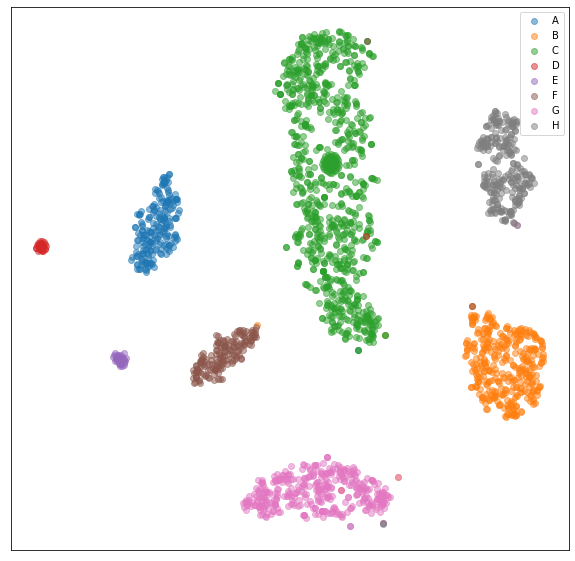

In [869]:
plt.figure(figsize = [10,10])
point_labels = ['A', 'B','C', 'D', 'E', 'F','G','H']
for i in range(8):
    idx = torch.where(train_labels == i)[0]
    plt.scatter(result[idx,0], result[idx,1], label = point_labels[i],alpha = 0.5,cmap = plt.cm.rainbow)

plt.legend(loc = "best", fontsize = 15)
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)
plt.legend(loc='upper right')
# plt.show()
plt.savefig('./dataset/tsne_data/230111realbert.pdf',
            facecolor='white',
            edgecolor='black',
            format='pdf', dpi=300)

In [870]:
original_test_data = []
original_test_data_label = []

for i,v in enumerate(x_test):
    original_test_data.append(torch.tensor(v))
    original_test_data_label.append(torch.tensor(y_test[i]))
original_test_data = torch.stack(original_test_data)
original_test_data_label = torch.stack(original_test_data_label)

In [871]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

# 2차원으로 차원 축소
n_components = 2

# t-sne 모델 생성
tsne = TSNE(n_components=n_components)

# 학습한 결과 2차원 공간 값 출력
result = tsne.fit_transform(original_test_data.numpy())

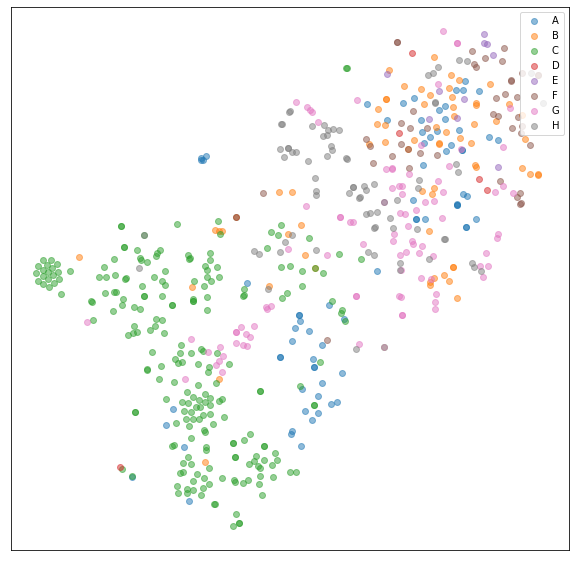

In [872]:
plt.figure(figsize = [10,10])
point_labels = ['A', 'B','C', 'D', 'E', 'F','G','H']
for i in range(8):
    idx = torch.where(original_test_data_label == i)[0]
    plt.scatter(result[idx,0], result[idx,1], label = point_labels[i],alpha = 0.5,cmap='jet')

plt.legend(loc = "best", fontsize = 15)
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)
plt.legend(loc='upper right')
# plt.show()
plt.savefig('./dataset/tsne_data/bert.pdf',
            facecolor='white',
            edgecolor='black',
            format='pdf', dpi=300)

In [873]:
total_out = []
total_labels = []
model.eval()
for idx, (data, labels) in enumerate(test_dataloader):
    out1, out2 = model(data.cuda(), torch.ones(1024).cuda())
    total_out.append(out1.cpu().detach())
    total_labels.append(labels)
total_out = torch.cat(total_out)
total_labels = torch.cat(total_labels)

In [874]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

# 2차원으로 차원 축소
n_components = 2

# t-sne 모델 생성
tsne = TSNE(n_components=n_components)

# 학습한 결과 2차원 공간 값 출력
result = tsne.fit_transform(total_out.numpy())

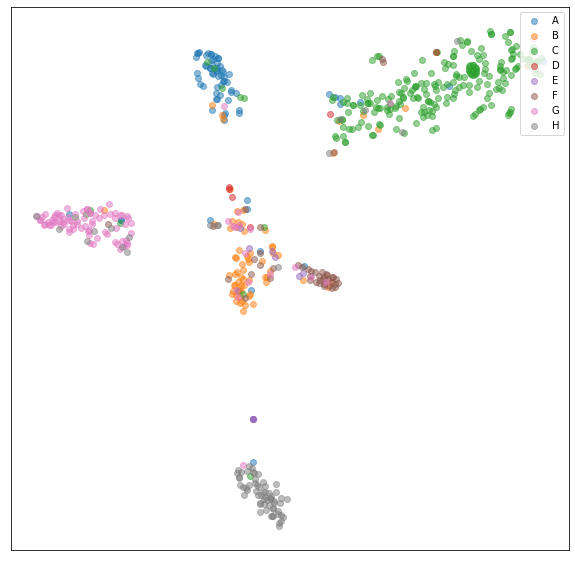

In [875]:
plt.figure(figsize = [10,10])
point_labels = ['A', 'B','C', 'D', 'E', 'F','G','H']
for i in range(8):
    idx = torch.where(total_labels == i)[0]
    plt.scatter(result[idx,0], result[idx,1], label = point_labels[i],alpha = 0.5, cmap='jet')

plt.legend(loc = "best", fontsize = 15)
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)
plt.legend(loc='upper right')
# plt.show()
plt.savefig('./dataset/tsne_data/bertmatch.pdf',
            facecolor='white',
            edgecolor='black',
            format='pdf', dpi=300)

In [876]:
print(len(total_out))
# print(len(total_out_2))

600


In [877]:
total_out_list = []
for i,v in enumerate(total_out):
    total_out_list.append(v.numpy())

In [878]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarities = cosine_similarity(total_out_list, total_out_list)
print('코사인 유사도 매트릭스의 크기 :',cosine_similarities.shape)

코사인 유사도 매트릭스의 크기 : (600, 600)


In [879]:
cosine_sim = cosine_similarity(total_out_list, total_out_list)
print('코사인 유사도 연산 결과 :',cosine_sim.shape)

코사인 유사도 연산 결과 : (600, 600)


In [880]:
fake_data = np.random.randn(len(total_out_list),2)
a = pd.DataFrame(fake_data,columns = ['name','embedding'])

In [881]:
for i in range(len(total_out)):
    a['embedding'].loc[i] = np.array(total_out[i],dtype=object)

/home/ubuntu/anaconda3/envs/pytorch1.7.1_p37/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [882]:
# for i,v in enumerate(data_original.patentName):
#     a.name[i] = v

In [883]:
a.head()

,name,embedding
0,-1.136615,"[0.0006307568401098251, 0.06315382570028305, -..."
1,-0.953470,"[-0.08305250108242035, -0.13461503386497498, 0..."
2,-0.149180,"[-0.11869161576032639, -0.023387230932712555, ..."
3,-1.374257,"[-0.0994943380355835, 0.1097574532032013, -0.1..."
4,-0.210796,"[-0.10286426544189453, 0.10753102600574493, -0..."


In [909]:
len(a)

600

In [884]:
# for i,v in enumerate(a.name):
#     a.name[i] = a.name[i][2:]
# for i,v in enumerate(a.name):
#     a.name[i] = a.name[i][:-2]

## Similarity Patent

In [885]:
def recommendations(index,title):
    # patentmatch :total_out_2
    # uspto : total_out
    books = a['name']

    # 책의 제목을 입력하면 해당 제목의 인덱스를 리턴받아 idx에 저장.
    indices = pd.Series(a.index, index = a['name']).drop_duplicates()    
    idx = indices[title]

    # 입력된 책과 줄거리(document embedding)가 유사한 책 5개 선정.
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    sim_scores = sim_scores[1:index+1]

    # 가장 유사한 책 5권의 인덱스
    book_indices = [i[0] for i in sim_scores]

    # 전체 데이터프레임에서 해당 인덱스의 행만 추출. 5개의 행을 가진다.
    recommend = books.iloc[book_indices].reset_index(drop=True)
    recommend_list = recommend
    
#     print(recommend)
#     for i in recommend.Patent:
#         print(top_n_df[['Patent','semi_code']].loc[top_n_df['Patent'] == i])
#     fig = plt.figure(figsize=(20, 30))
#     recommend.tolist()
    return recommend_list


In [886]:
# title_to_index = dict(zip(data_original['patentName'], data_original.index))

In [887]:
print(len(total_out)) 
print(len(total_labels))

600
600


In [888]:
# total_out
# total_labels
# t_sne_dataframe_dictiona ={'bert_sentence_embedding':total_out,'label':total_labels}
# t_sne_dataframe = pd.DataFrame(t_sne_dataframe_dictiona)

t_sne_dataframe_dictiona ={'bert_sentence_embedding':total_out,'label':total_labels}
t_sne_dataframe = pd.DataFrame(t_sne_dataframe_dictiona)



In [889]:
t_sne_dataframe

,bert_sentence_embedding,label
0,"(tensor(0.0006), tensor(0.0632), tensor(-0.052...",0
1,"(tensor(-0.0831), tensor(-0.1346), tensor(0.07...",6
2,"(tensor(-0.1187), tensor(-0.0234), tensor(0.01...",4
3,"(tensor(-0.0995), tensor(0.1098), tensor(-0.11...",7
4,"(tensor(-0.1029), tensor(0.1075), tensor(-0.12...",7
...,...,...
595,"(tensor(-0.0795), tensor(0.0277), tensor(-0.04...",2
596,"(tensor(-0.0951), tensor(0.1161), tensor(-0.12...",7
597,"(tensor(-0.1492), tensor(-0.0451), tensor(0.03...",5
598,"(tensor(-0.0900), tensor(0.1558), tensor(-0.03...",5


In [890]:
for i,v in enumerate(t_sne_dataframe.bert_sentence_embedding):
    t_sne_dataframe['bert_sentence_embedding'].loc[i] = np.array(total_out[i],dtype=object)
#     t_sne_dataframe['label'].loc[i] = np.array(original_out_label[i],dtype=object)

/home/ubuntu/anaconda3/envs/pytorch1.7.1_p37/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [891]:
t_sne_dataframe

,bert_sentence_embedding,label
0,"[0.0006307568401098251, 0.06315382570028305, -...",0
1,"[-0.08305250108242035, -0.13461503386497498, 0...",6
2,"[-0.11869161576032639, -0.023387230932712555, ...",4
3,"[-0.0994943380355835, 0.1097574532032013, -0.1...",7
4,"[-0.10286426544189453, 0.10753102600574493, -0...",7
...,...,...
595,"[-0.07952684164047241, 0.02768084779381752, -0...",2
596,"[-0.0950961709022522, 0.11607278883457184, -0....",7
597,"[-0.1491681933403015, -0.04513418674468994, 0....",5
598,"[-0.08995797485113144, 0.15576079487800598, -0...",5


In [892]:
a_center = []
b_center = []
c_center = []
d_center = []
e_center = []
f_center = []
g_center = []
h_center = []

for i in range(len(t_sne_dataframe)):
    if t_sne_dataframe.label[i] == 0:
        a_center.append(t_sne_dataframe.bert_sentence_embedding[i])
    elif t_sne_dataframe.label[i] == 1 :
        b_center.append(t_sne_dataframe.bert_sentence_embedding[i])
    elif t_sne_dataframe.label[i] == 2 :
        c_center.append(t_sne_dataframe.bert_sentence_embedding[i])
    elif t_sne_dataframe.label[i] == 3 :
        d_center.append(t_sne_dataframe.bert_sentence_embedding[i])
    elif t_sne_dataframe.label[i] == 4 :
        e_center.append(t_sne_dataframe.bert_sentence_embedding[i])
    elif t_sne_dataframe.label[i] ==5:
        f_center.append(t_sne_dataframe.bert_sentence_embedding[i])
    elif t_sne_dataframe.label[i] == 6:
        g_center.append(t_sne_dataframe.bert_sentence_embedding[i])
    elif t_sne_dataframe.label[i] == 7:
        h_center.append(t_sne_dataframe.bert_sentence_embedding[i])

# for i in range(len(t_sne_dataframe)):
#     if t_sne_dataframe.label[i] == 'A':
#         a_center.append(t_sne_dataframe.bert_sentence_embedding[i])
#     elif t_sne_dataframe.label[i] == 'B':
#         b_center.append(t_sne_dataframe.bert_sentence_embedding[i])
#     elif t_sne_dataframe.label[i] == 'C':
#         c_center.append(t_sne_dataframe.bert_sentence_embedding[i])
#     elif t_sne_dataframe.label[i] == 'D' :
#         d_center.append(t_sne_dataframe.bert_sentence_embedding[i])
#     elif t_sne_dataframe.label[i] == 'E':
#         e_center.append(t_sne_dataframe.bert_sentence_embedding[i])
#     elif t_sne_dataframe.label[i] == 'F':
#         f_center.append(t_sne_dataframe.bert_sentence_embedding[i])
#     elif t_sne_dataframe.label[i] == 'G' :
#         g_center.append(t_sne_dataframe.bert_sentence_embedding[i])
#     elif t_sne_dataframe.label[i] == 'H':
#         h_center.append(t_sne_dataframe.bert_sentence_embedding[i])


# print(len(np.sum(a_center,axis=0)))
# print(len(a_center))

a_center_value = np.sum(a_center,axis=0)/len(a_center)
b_center_value = np.sum(b_center,axis=0)/len(b_center)
c_center_value = np.sum(c_center,axis=0)/len(c_center)
d_center_value = np.sum(d_center,axis=0)/len(d_center)
e_center_value = np.sum(e_center,axis=0)/len(e_center)
f_center_value = np.sum(f_center,axis=0)/len(f_center)
g_center_value = np.sum(g_center,axis=0)/len(g_center)
h_center_value = np.sum(h_center,axis=0)/len(h_center)
# print(a_center_value)
# print(len(a_center_value))

import math

test_tsne_df = t_sne_dataframe[['bert_sentence_embedding','label']]
test_tsne_df.columns = ['embedding','label']

In [893]:
# for i,v in enumerate(test_tsne_df.embedding):
#     test_tsne_df['embedding'].loc[i] = np.array(total_out[i],dtype=object)

In [894]:
test_tsne_df

,embedding,label
0,"[0.0006307568401098251, 0.06315382570028305, -...",0
1,"[-0.08305250108242035, -0.13461503386497498, 0...",6
2,"[-0.11869161576032639, -0.023387230932712555, ...",4
3,"[-0.0994943380355835, 0.1097574532032013, -0.1...",7
4,"[-0.10286426544189453, 0.10753102600574493, -0...",7
...,...,...
595,"[-0.07952684164047241, 0.02768084779381752, -0...",2
596,"[-0.0950961709022522, 0.11607278883457184, -0....",7
597,"[-0.1491681933403015, -0.04513418674468994, 0....",5
598,"[-0.08995797485113144, 0.15576079487800598, -0...",5


In [895]:
# print(t_sne_dataframe.loc[0])
# np.subtract() ㅂㅐ열간 빼기
nearest_list = []

for i,v in enumerate(test_tsne_df.embedding):
#     v = np.array(v)
    minsection = 99999
    result = 'none'
    if np.sqrt(np.sum(np.subtract(a_center_value,v)**2,axis=0)) < minsection:
        minsection = np.sqrt(np.sum(np.subtract(a_center_value,v)**2,axis=0))
        result = 0
    
    if np.sqrt(np.sum(np.subtract(b_center_value,v)**2,axis=0)) < minsection:
        minsection = np.sqrt(np.sum(np.subtract(b_center_value,v)**2,axis=0))
        result = 1
    
    if np.sqrt(np.sum(np.subtract(c_center_value,v)**2,axis=0)) < minsection:
        minsection = np.sqrt(np.sum(np.subtract(c_center_value,v)**2,axis=0))
        result = 2
    
    if np.sqrt(np.sum(np.subtract(d_center_value,v)**2,axis=0)) < minsection:
        minsection = np.sqrt(np.sum(np.subtract(d_center_value,v)**2,axis=0))
        result = 3
    
    if np.sqrt(np.sum(np.subtract(e_center_value,v)**2,axis=0)) < minsection:
        minsection = np.sqrt(np.sum(np.subtract(e_center_value,v)**2,axis=0))
        result = 4
    
    if np.sqrt(np.sum(np.subtract(f_center_value,v)**2,axis=0)) < minsection:
        minsection = np.sqrt(np.sum(np.subtract(f_center_value,v)**2,axis=0))
        result = 5
    
    if np.sqrt(np.sum(np.subtract(g_center_value,v)**2,axis=0)) < minsection:
        minsection = np.sqrt(np.sum(np.subtract(g_center_value,v)**2,axis=0))
        result = 6
    
    if np.sqrt(np.sum(np.subtract(h_center_value,v)**2,axis=0)) < minsection:
        minsection = np.sqrt(np.sum(np.subtract(h_center_value,v)**2,axis=0))
        result = 7
    nearest_list.append(result)

# for i,v in enumerate(test_tsne_df.embedding):
# #     v = np.array(v)
#     minsection = 99999
#     result = 'none'
#     if np.sqrt(np.sum(np.subtract(a_center_value,v)**2,axis=0)) < minsection:
#         minsection = np.sqrt(np.sum(np.subtract(a_center_value,v)**2,axis=0))
#         result ='A' 
    
#     if np.sqrt(np.sum(np.subtract(b_center_value,v)**2,axis=0)) < minsection:
#         minsection = np.sqrt(np.sum(np.subtract(b_center_value,v)**2,axis=0))
#         result ='B' 
    
#     if np.sqrt(np.sum(np.subtract(c_center_value,v)**2,axis=0)) < minsection:
#         minsection = np.sqrt(np.sum(np.subtract(c_center_value,v)**2,axis=0))
#         result = 'C'
    
#     if np.sqrt(np.sum(np.subtract(d_center_value,v)**2,axis=0)) < minsection:
#         minsection = np.sqrt(np.sum(np.subtract(d_center_value,v)**2,axis=0))
#         result = 'D'
    
#     if np.sqrt(np.sum(np.subtract(e_center_value,v)**2,axis=0)) < minsection:
#         minsection = np.sqrt(np.sum(np.subtract(e_center_value,v)**2,axis=0))
#         result = 'E'
    
#     if np.sqrt(np.sum(np.subtract(f_center_value,v)**2,axis=0)) < minsection:
#         minsection = np.sqrt(np.sum(np.subtract(f_center_value,v)**2,axis=0))
#         result ='F' 
    
#     if np.sqrt(np.sum(np.subtract(g_center_value,v)**2,axis=0)) < minsection:
#         minsection = np.sqrt(np.sum(np.subtract(g_center_value,v)**2,axis=0))
#         result = 'G' 
    
#     if np.sqrt(np.sum(np.subtract(h_center_value,v)**2,axis=0)) < minsection:
#         minsection = np.sqrt(np.sum(np.subtract(h_center_value,v)**2,axis=0))
#         result = 'H'
#     nearest_list.append(result)

test_tsne_df['nearest_section'] = nearest_list

In [896]:
from sklearn.metrics import confusion_matrix
columns_labels = ['A','B','C','D','E','F','G','H']
y_true = test_tsne_df.label
y_pred = test_tsne_df.nearest_section
confusion_matrix(y_true, y_pred)

array([[ 55,   4,   7,   1,   0,   1,   3,   2],
       [  3,  49,   5,   2,   2,   4,   2,   0],
       [  5,   2, 218,   0,   0,   0,   4,   1],
       [  0,   1,   2,   3,   0,   0,   0,   0],
       [  0,   4,   0,   0,   4,   2,   0,   0],
       [  0,  10,   3,   0,   0,  28,   2,   0],
       [  1,   9,   2,   0,   0,   3,  78,   1],
       [  0,   1,   5,   0,   0,   0,   9,  62]])

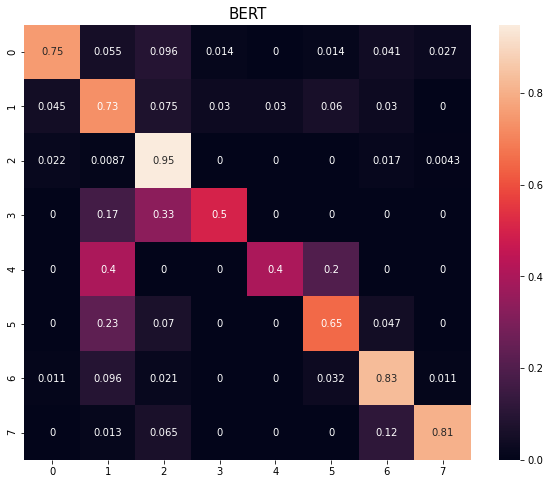

In [897]:
plt .figure(figsize = (10,8))
plt.title('BERT',fontsize=15)
sns.heatmap(confusion_matrix(y_true, y_pred,normalize='true'), annot=True)
plt.savefig('./dataset/tsne_data/230111bertContrastive.pdf',
            facecolor='white',
            edgecolor='black',
            format='pdf', dpi=300)

In [898]:
test_tsne_df

,embedding,label,nearest_section
0,"[0.0006307568401098251, 0.06315382570028305, -...",0,2
1,"[-0.08305250108242035, -0.13461503386497498, 0...",6,6
2,"[-0.11869161576032639, -0.023387230932712555, ...",4,1
3,"[-0.0994943380355835, 0.1097574532032013, -0.1...",7,7
4,"[-0.10286426544189453, 0.10753102600574493, -0...",7,7
...,...,...,...
595,"[-0.07952684164047241, 0.02768084779381752, -0...",2,0
596,"[-0.0950961709022522, 0.11607278883457184, -0....",7,7
597,"[-0.1491681933403015, -0.04513418674468994, 0....",5,1
598,"[-0.08995797485113144, 0.15576079487800598, -0...",5,5


In [899]:
print(len(test_tsne_df))

600


In [900]:
num = 0
for i,v in enumerate(test_tsne_df.label):
    if v == test_tsne_df.nearest_section[i]:
        num+=1
print(num / len(test_tsne_df.label))

0.8283333333333334


In [901]:
def cos_dis(vector1,vector2):
    distance = np.sum((vector1-vector2)**2)
    return distance

In [902]:
from sklearn.preprocessing import LabelEncoder
# input_labels = [0,1,2,3,4,5,6,7]
# encoder = LabelEncoder()
# encoder.fit(input_labels)
test_tsne_df.label = encoder.inverse_transform(test_tsne_df.label)
test_tsne_df.nearest_section = encoder.inverse_transform(test_tsne_df.nearest_section)

In [903]:
# total_data

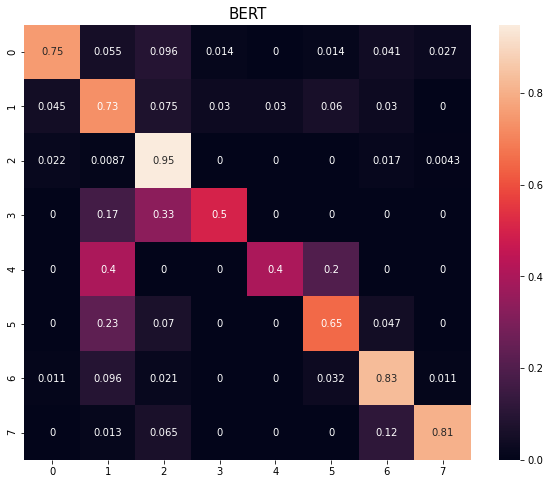

In [904]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
columns_labels = ['A','B','C','D','E','F','G','H']
y_true = test_tsne_df.label
y_pred = test_tsne_df.nearest_section
confusion_matrix(y_true, y_pred)
plt .figure(figsize = (10,8))
plt.title('BERT',fontsize=15)
sns.heatmap(confusion_matrix(y_true, y_pred,labels=columns_labels,normalize='true'), annot=True)
plt.savefig('./dataset/tsne_data/230111_1bertContrastive.pdf',
            facecolor='white',
            edgecolor='black',
            format='pdf', dpi=300)

In [905]:
from sklearn import metrics
y_true = test_tsne_df.label
y_pred = test_tsne_df.nearest_section
# Print the confusion matrix
print(metrics.confusion_matrix(y_true, y_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_true, y_pred, digits=8))

[[ 55   4   7   1   0   1   3   2]
 [  3  49   5   2   2   4   2   0]
 [  5   2 218   0   0   0   4   1]
 [  0   1   2   3   0   0   0   0]
 [  0   4   0   0   4   2   0   0]
 [  0  10   3   0   0  28   2   0]
 [  1   9   2   0   0   3  78   1]
 [  0   1   5   0   0   0   9  62]]
              precision    recall  f1-score   support

           A  0.85937500 0.75342466 0.80291971        73
           B  0.61250000 0.73134328 0.66666667        67
           C  0.90082645 0.94782609 0.92372881       230
           D  0.50000000 0.50000000 0.50000000         6
           E  0.66666667 0.40000000 0.50000000        10
           F  0.73684211 0.65116279 0.69135802        43
           G  0.79591837 0.82978723 0.81250000        94
           H  0.93939394 0.80519481 0.86713287        77

    accuracy                      0.82833333       600
   macro avg  0.75144032 0.70234236 0.72053826       600
weighted avg  0.83243749 0.82833333 0.82768343       600



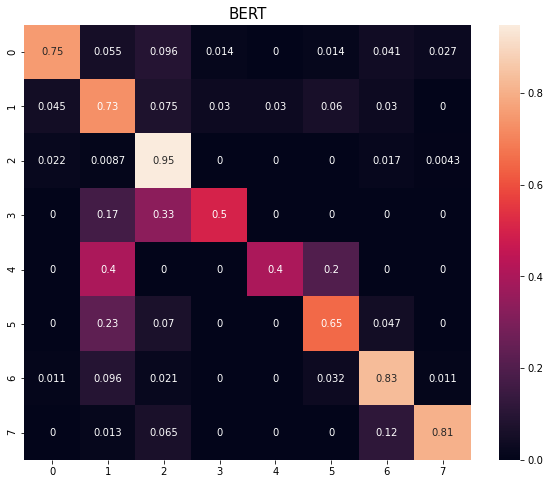

In [908]:
plt .figure(figsize = (10,8))
plt.title('BERT',fontsize=15)
sns.heatmap(confusion_matrix(y_true, y_pred,labels=columns_labels,normalize='true'), annot=True)
plt.savefig('./dataset/tsne_data/230111_1bertContrastive.pdf',
            facecolor='white',
            edgecolor='black',
            format='pdf', dpi=300)

In [906]:
test_tsne_df['label']

0      A
1      G
2      E
3      H
4      H
      ..
595    C
596    H
597    F
598    F
599    C
Name: label, Length: 600, dtype: object